Análisis de sentimientos en las redes sociales

In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sentiments = pd.read_csv('sentimentdataset.csv')

In [3]:
sentiments.shape

(732, 15)

In [4]:
sentiments.describe

<bound method NDFrame.describe of      Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       Happy    
7

In [5]:
sentiments.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [6]:
sentiments['Sentiment'] = sentiments['Sentiment'].str.strip()
valores_unicos = sentiments['Sentiment'].nunique()
valores_unicos

191

In [7]:
valores_unicos = sentiments['Sentiment'].drop_duplicates().str.strip().str.lower().unique()
titulo_sentimiento = (valores_unicos)
titulo_sentimiento

array(['positive', 'negative', 'neutral', 'anger', 'fear', 'sadness',
       'disgust', 'happiness', 'joy', 'love', 'amusement', 'enjoyment',
       'admiration', 'affection', 'awe', 'disappointed', 'surprise',
       'acceptance', 'adoration', 'anticipation', 'bitter', 'calmness',
       'confusion', 'excitement', 'kind', 'pride', 'shame', 'elation',
       'euphoria', 'contentment', 'serenity', 'gratitude', 'hope',
       'empowerment', 'compassion', 'tenderness', 'arousal', 'enthusiasm',
       'fulfillment', 'reverence', 'despair', 'grief', 'loneliness',
       'jealousy', 'resentment', 'frustration', 'boredom', 'anxiety',
       'intimidation', 'helplessness', 'envy', 'regret', 'curiosity',
       'indifference', 'numbness', 'melancholy', 'nostalgia',
       'ambivalence', 'determination', 'zest', 'hopeful', 'proud',
       'grateful', 'empathetic', 'compassionate', 'playful',
       'free-spirited', 'inspired', 'confident', 'bitterness', 'yearning',
       'fearful', 'apprehensiv

Clasificación de sentimientos

In [8]:
palabras_positivas = [
    'Happiness', 'Joy', 'Love', 'Enjoyment', 'Kind', 'Excitement', 'Calmness', 'Adoration',
    'Acceptance', 'Anticipation', 'Pride', 'Elation', 'Fulfillment', 'Enthusiasm', 
    'Compassion', 'Empowerment', 'Hope', 'Gratitude', 'Serenity', 'Happy',
    'Zest', 'Contentment', 'Hopeful', 'Playful', 'Free-spirited', 'Proud', 'Empathetic', 
    'Surprise', 'Tenderness', 'Arousal', 'Compassionate', 'Inspired', 'Curiosity',
    'Thrill', 'Overjoyed', 'Optimism', 'Mindfulness', 'DreamChaser', 
    'Elegance', 'Whimsy', 'Harmony', 'Rejuvenation', 'Inspiration', 'Adventure', 
    'FestiveJoy', 'InnerJourney', 'Freedom', 'Reflection', 'Adrenaline', 'ArtisticBurst', 
    'Radiance', 'Wonder', 'CulinaryOdyssey', 'Coziness', 'Resilience', 
    'Immersion', 'Success', 'Enchantment', 'Exploration', 'Amazement', 'Romance',
    'Tranquility', 'Energy', 'Celebration', 'Charm', 'Creativity',
    'Colorful', 'Iconic', 'Contemplation', 'Determination', 'Heartwarming',  
    'Renewed Effort', 'Sympathy', 'Solace', 'Mesmerizing', "Nature's Beauty", 
    'Celestial Wonder', 'Creative Inspiration', 'Runway Creativity', "Ocean's Freedom",
    'Accomplishment', 'Admiration', 'Affection', 'Amusement', 'Appreciation', 'Blessed', 
    'Connection', 'Culinary Adventure', 'Dazzle', 'Ecstasy', 'Emotion', 
    'Grateful', 'Grandeur', 'Imagination', 'Journey', 'JoyfulReunion', 'Kindness', 
    'PlayfulJoy', 'Relief', 'Satisfaction', 'Thrilling Journey', 'Touched', 'Triumph', 
    'Vibrancy', 'Wonderment'
]
palabras_positivas = list(dict.fromkeys([palabra.strip() for palabra in palabras_positivas]))
expresion_positiva = re.compile('|'.join(map(re.escape, palabras_positivas)), flags=re.IGNORECASE)
sentiments['Sentiment'] = sentiments['Sentiment'].str.replace(expresion_positiva, 'Positive', regex=True)
sentiments['Sentiment'] = sentiments['Sentiment'].str.strip()
positive = sentiments.loc[sentiments['Sentiment'] == 'Positive']
positive

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
5,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
6,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Positive,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Positive,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Positive,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Positive,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [9]:
palabras_negativas = [
    'Anger', 'Sadness', 'Fear', 'Disgust', 'Affection', 'Awe', 'Disappointment',
    'Bitter', 'Bitterness', 'Shame', 'Anxiety', 'Envy', 'Regret', 'Despair',
    'Grief', 'Loneliness', 'Jealousy', 'Resentment', 'Frustration', 'Boredom',
    'Indifference', 'Melancholy', 'Nostalgia', 'Fearful', 'Apprehensive',
    'Overwhelmed', 'Devastated', 'Frustrated', 'Envious', 'Dismissive',
    'Isolation', 'Darkness', 'Desperation', 'Whimsy', 'Betrayal', 'Heartbreak',
    'Loss', 'Suffering', 'EmotionalStorm', 'LostLove', 'Exhaustion', 'Sorrow',
    'Bad', 'Hate', 'Sad', 'Ruins', 'Solitude', 'Embarrassed', 'Obstacle',
    'Pressure', 'Miscalculation', 'Mischievous', 'Intimidation', 'Breakthrough',
    'Desolation', 'Despair', 'Devastated', 'Disappointed', 'Disgust', 
    'Dismissive', 'Embarrassed', 'Envious', 'Grief', 'Heartache', 'Heartbreak', 
    'Helplessness', 'Indifference', 'Loss', 'Overwhelmed', 'Shame', 'Sorrow', 
    'Solitude', 'Suffering'
]

expresion_negativa = re.compile('|'.join(map(str.strip, palabras_negativas)), flags=re.IGNORECASE)
sentiments['Sentiment'] = sentiments['Sentiment'].str.replace(expresion_negativa, 'Negative', regex=True)
negative = sentiments.loc[sentiments['Sentiment'] == 'Negative']
negative

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
8,8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
11,11,11,Feeling a bit under the weather today. ...,Negative,2023-01-18 10:30:00,WellnessCheck,Twitter,#SickDay #Health,7.0,15.0,Canada,2023,1,18,10
19,19,19,Winter blues got me feeling low. ...,Negative,2023-01-20 15:15:00,WinterBlues,Instagram,#WinterBlues #Mood,8.0,15.0,USA,2023,1,20,15
52,53,55,Can't believe the injustice happening in our ...,Negative,2023-02-11 09:30:00,SocialJustice,Twitter,#Injustice #Angry,20.0,40.0,Canada,2023,2,11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,700,704,Having a bad hair day and feeling self-conscio...,Negative,2023-09-27 17:30:00,BadHairDayBluesHighSchool,Instagram,#BadHairDay #HighSchoolConfidence,18.0,36.0,Canada,2023,9,27,17
700,701,705,Feeling a sense of despair after a major proje...,Negative,2023-09-28 22:00:00,ProjectFailureDespairHighSchool,Facebook,#ProjectStruggles #HighSchoolHardships,21.0,41.0,UK,2023,9,28,22
701,702,706,Experiencing hate comments for expressing pers...,Negative,2023-09-29 15:45:00,OpinionsHateHighSchool,Twitter,#OnlineOpinions #HighSchoolCriticism,24.0,48.0,USA,2023,9,29,15
702,703,707,Having a string of bad luck with constant tech...,Negative,2023-09-30 18:20:00,TechMalfunctionWoesHighSchool,Instagram,#TechIssues #HighSchoolTech,22.0,43.0,Canada,2023,9,30,18


In [10]:
sentiments['Sentiment'] = sentiments['Sentiment'].apply(lambda x: 'Neutral' if x not in ['Positive', 'Negative'] else x)
neutral = sentiments.loc[sentiments['Sentiment'] == 'Neutral']
neutral

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
9,9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12
14,14,14,Technology is changing the way we live. ...,Neutral,2023-01-19 09:45:00,TechEnthusiast,Twitter,#Tech #Innovation,15.0,30.0,India,2023,1,19,9
18,18,18,Attending a virtual conference on AI. ...,Neutral,2023-01-20 11:30:00,TechConference,Facebook,#AI #TechConference,25.0,50.0,USA,2023,1,20,11
71,72,74,Confusion clouds my mind as I navigate throug...,Neutral,2023-02-18 14:20:00,ConfusedMind,Instagram,#Confusion #DecisionMaking,25.0,50.0,UK,2023,2,18,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,714,718,Participating in a science fair to showcase a ...,Neutral,2023-10-11 16:45:00,ScienceFairParticipationHighSchool,Facebook,#ScienceFair #HighSchoolScience,19.0,37.0,USA,2023,10,11,16
714,715,719,Attending a workshop on time management to enh...,Neutral,2023-10-12 18:20:00,TimeManagementWorkshopHighSchool,Twitter,#EfficiencyGoals #HighSchoolSkills,23.0,44.0,Canada,2023,10,12,18
715,716,720,Volunteering at a local charity event to give ...,Neutral,2023-10-13 12:30:00,CharityEventVolunteerHighSchool,Instagram,#CommunityService #HighSchoolVolunteer,20.0,39.0,UK,2023,10,13,12
716,717,721,Collaborating on a group project to promote te...,Neutral,2023-10-14 17:30:00,GroupProjectCollaborationHighSchool,Facebook,#TeamSpirit #HighSchoolProjects,18.0,35.0,USA,2023,10,14,17


In [11]:
print(positive.shape)
print(negative.shape)
print(neutral.shape)

(431, 15)
(196, 15)
(105, 15)


In [12]:
valores_unicos = sentiments['Sentiment'].drop_duplicates().str.strip().str.lower().unique()
titulo_sentimiento = (valores_unicos)
titulo_sentimiento

array(['positive', 'negative', 'neutral'], dtype=object)

calculos de porcentajes de la cantidad de sentimientos positivos, negativos y neutrales en el dataset

In [13]:
cantidad_total = sentiments['Sentiment'].value_counts()
cantidad_total

Sentiment
Positive    431
Negative    196
Neutral     105
Name: count, dtype: int64

In [14]:
porcentajes = (cantidad_total / len(sentiments)) * 100
porcentajes

Sentiment
Positive    58.879781
Negative    26.775956
Neutral     14.344262
Name: count, dtype: float64

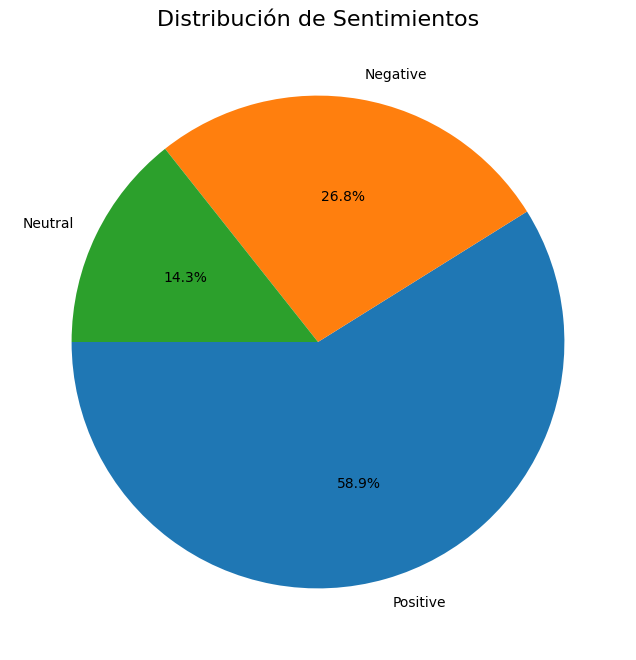

In [15]:
sentimiento = ['Positive', 'Negative', 'Neutral']
porcentajes = [58.87, 26.77, 14.34]  # Porcentajes de cada categoría
plt.figure(figsize=(8, 8))
plt.pie(porcentajes, labels=sentimiento, autopct='%1.1f%%', startangle=180)
plt.title('Distribución de Sentimientos', fontsize=16)
plt.show()

Clasificación de horarios. Para 'work' se toma en cuenta la jornada laboral del pais, mientras que para 'school' se consideran los meses que no son vacaciones de verano. 

In [16]:
horarios = {
    '1': {'pais': 'USA', 'work': (9, 17), 'school': (1, 2, 3, 4, 5, 10, 11, 12)},
    '2': {'pais': 'Canada', 'work': (9, 17), 'school': (1, 2, 3, 4, 5, 6, 9, 10, 11, 12)},
    '3': {'pais': 'UK', 'work': (9, 17), 'school': (1, 2, 3, 4, 5, 6, 9, 10, 11, 12)},
    '4': {'pais': 'Australia', 'work': (9, 17), 'school': (2, 3, 4, 5, 6, 7, 8, 9, 10, 11)},
    '5': {'pais': 'India', 'work': (9, 18), 'school': (1, 2, 3, 4, 7, 8, 9, 10, 11, 12)},
    '6': {'pais': 'France', 'work': (9, 18), 'school': (1, 2, 3, 4, 5, 6, 9, 10, 11, 12)},
    '7': {'pais': 'Brazil', 'work': (8, 18), 'school': (2, 3, 4, 5, 6, 7, 8, 9, 10, 11)},
    '8': {'pais': 'Japan', 'work': (9, 18), 'school': (1, 2, 3, 4, 5, 6, 7, 10, 11, 12)},
    '9': {'pais': 'Greece', 'work': (9, 17), 'school': (1, 2, 3, 4, 5, 10, 11, 12)},
    '10': {'pais': 'Germany', 'work': (9, 17), 'school': (1, 2, 3, 4, 5, 10, 11, 12)},
    '11': {'pais': 'Sweden', 'work': (8, 17), 'school': (1, 2, 3, 4, 5, 9, 10, 11, 12)},
    '12': {'pais': 'Italy', 'work': (9, 18), 'school': (1, 2, 3, 4, 5, 10, 11, 12)},
    '13': {'pais': 'Netherlands', 'work': (9, 17), 'school': (1, 2, 3, 4, 5, 6, 9, 10, 11, 12)},
    '14': {'pais': 'South Africa', 'work': (8, 17), 'school': (2, 3, 4, 5, 6, 7, 8, 9, 10, 11)},
    '15': {'pais': 'Spain', 'work': (9, 18), 'school': (1, 2, 3, 4, 5, 10, 11, 12)},
    '16': {'pais': 'Portugal', 'work': (9, 18), 'school': (1, 2, 3, 4, 5, 10, 11, 12)},
    '17': {'pais': 'Switzerland', 'work': (8, 17), 'school': (1, 2, 3, 4, 5, 6, 9, 10, 11, 12)},
    '18': {'pais': 'Austria', 'work': (8, 17), 'school': (1, 2, 3, 4, 5, 6, 9, 10, 11, 12)},
    '19': {'pais': 'Belgium', 'work': (8, 17), 'school': (1, 2, 3, 4, 5, 6, 9, 10, 11, 12)},
    '20': {'pais': 'Denmark', 'work': (8, 16), 'school': (1, 2, 3, 4, 5, 6, 9, 10, 11, 12)},
    '21': {'pais': 'Czech Republic', 'work': (8, 16), 'school': (1, 2, 3, 4, 5, 6, 9, 10, 11, 12)},
    '22': {'pais': 'Jordan', 'work': (8, 15), 'school': (1, 2, 3, 4, 5, 6, 9, 10, 11, 12)},
    '23': {'pais': 'Peru', 'work': (8, 16), 'school': (4, 5, 6, 7, 8, 9, 10, 11, 12)},
    '24': {'pais': 'Maldives', 'work': (8, 15), 'school': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)},
    '25': {'pais': 'China', 'work': (9, 21), 'school': (1, 2, 3, 4, 5, 6, 9, 10, 11, 12)},
    '26': {'pais': 'Cambodia', 'work': (8, 15), 'school': (1, 2, 3, 4, 5, 6, 7, 8, 11, 12)},
    '27': {'pais': 'Norway', 'work': (8, 16), 'school': (1, 2, 3, 4, 5, 9, 10, 11, 12)},
    '28': {'pais': 'Colombia', 'work': (8, 17), 'school': (1, 2, 3, 4, 5, 8, 9, 10, 11, 12)},
    '29': {'pais': 'Ireland', 'work': (9, 17), 'school': (1, 2, 3, 4, 5, 9, 10, 11, 12)},
    '30': {'pais': 'Jamaica', 'work': (8, 16), 'school': (1, 2, 3, 4, 5, 10, 11, 12)},
    '31': {'pais': 'Kenya', 'work': (8, 15), 'school': (1, 2, 3, 4, 5, 6, 9, 10, 11, 12)},
    '32': {'pais': 'Scotland', 'work': (9, 17), 'school': (1, 2, 3, 4, 5, 9, 10, 11, 12)},
    '33': {'pais': 'Thailand', 'work': (8, 16), 'school': (1, 2, 6, 7, 8, 9, 10, 11, 12)},
}

dataframe_horarios = pd.DataFrame.from_dict(horarios, orient='index')
dataframe_horarios


,pais,work,school
1,USA,"(9, 17)","(1, 2, 3, 4, 5, 10, 11, 12)"
2,Canada,"(9, 17)","(1, 2, 3, 4, 5, 6, 9, 10, 11, 12)"
3,UK,"(9, 17)","(1, 2, 3, 4, 5, 6, 9, 10, 11, 12)"
4,Australia,"(9, 17)","(2, 3, 4, 5, 6, 7, 8, 9, 10, 11)"
5,India,"(9, 18)","(1, 2, 3, 4, 7, 8, 9, 10, 11, 12)"
6,France,"(9, 18)","(1, 2, 3, 4, 5, 6, 9, 10, 11, 12)"
7,Brazil,"(8, 18)","(2, 3, 4, 5, 6, 7, 8, 9, 10, 11)"
8,Japan,"(9, 18)","(1, 2, 3, 4, 5, 6, 7, 10, 11, 12)"
9,Greece,"(9, 17)","(1, 2, 3, 4, 5, 10, 11, 12)"
10,Germany,"(9, 17)","(1, 2, 3, 4, 5, 10, 11, 12)"


In [17]:
dataframe_horarios.reset_index(inplace=True)
dataframe_horarios.rename(columns={'index': 'ID'}, inplace=True)

sentiments['Country'] = sentiments['Country'].str.strip().str.lower()
dataframe_horarios['pais'] = dataframe_horarios['pais'].str.strip().str.lower()

sentiments2 = pd.merge(sentiments, dataframe_horarios, left_on='Country', right_on='pais', how='inner')
sentiments2

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,ID,pais,work,school
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,usa,2023,1,15,12,1,usa,"(9, 17)","(1, 2, 3, 4, 5, 10, 11, 12)"
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,canada,2023,1,15,8,2,canada,"(9, 17)","(1, 2, 3, 4, 5, 6, 9, 10, 11, 12)"
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,usa,2023,1,15,15,1,usa,"(9, 17)","(1, 2, 3, 4, 5, 10, 11, 12)"
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,uk,2023,1,15,18,3,uk,"(9, 17)","(1, 2, 3, 4, 5, 6, 9, 10, 11, 12)"
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,australia,2023,1,15,19,4,australia,"(9, 17)","(2, 3, 4, 5, 6, 7, 8, 9, 10, 11)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Positive,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,uk,2017,8,18,18,3,uk,"(9, 17)","(1, 2, 3, 4, 5, 6, 9, 10, 11, 12)"
728,729,733,Attending a surprise birthday party organized ...,Positive,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,usa,2018,6,22,14,1,usa,"(9, 17)","(1, 2, 3, 4, 5, 10, 11, 12)"
729,730,734,Successfully fundraising for a school charity ...,Positive,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,canada,2019,4,5,17,2,canada,"(9, 17)","(1, 2, 3, 4, 5, 6, 9, 10, 11, 12)"
730,731,735,"Participating in a multicultural festival, cel...",Positive,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,uk,2020,2,29,20,3,uk,"(9, 17)","(1, 2, 3, 4, 5, 6, 9, 10, 11, 12)"


In [18]:
valores_unicos = sentiments2['Country'].drop_duplicates().str.strip().str.lower().unique()
print(valores_unicos)

['usa' 'canada' 'uk' 'australia' 'india' 'france' 'brazil' 'japan'
 'greece' 'germany' 'sweden' 'italy' 'netherlands' 'south africa' 'spain'
 'portugal' 'switzerland' 'austria' 'belgium' 'denmark' 'czech republic'
 'jordan' 'peru' 'maldives' 'china' 'cambodia' 'norway' 'colombia'
 'ireland' 'jamaica' 'kenya' 'scotland' 'thailand']


In [19]:
sentiments['Country'] = sentiments['Country'].str.strip().str.lower()
dataframe_horarios['pais'] = dataframe_horarios['pais'].str.strip().str.lower()

#Cantidad de publicaciones por pais
cantidad_publicaciones_paises = sentiments2['Country'].value_counts().reset_index()
cantidad_publicaciones_paises.columns = ['Country', 'Post']
cantidad_publicaciones_paises

,Country,Post
0,usa,188
1,uk,143
2,canada,135
3,australia,75
4,india,70
5,brazil,17
6,france,16
7,japan,15
8,germany,14
9,italy,11


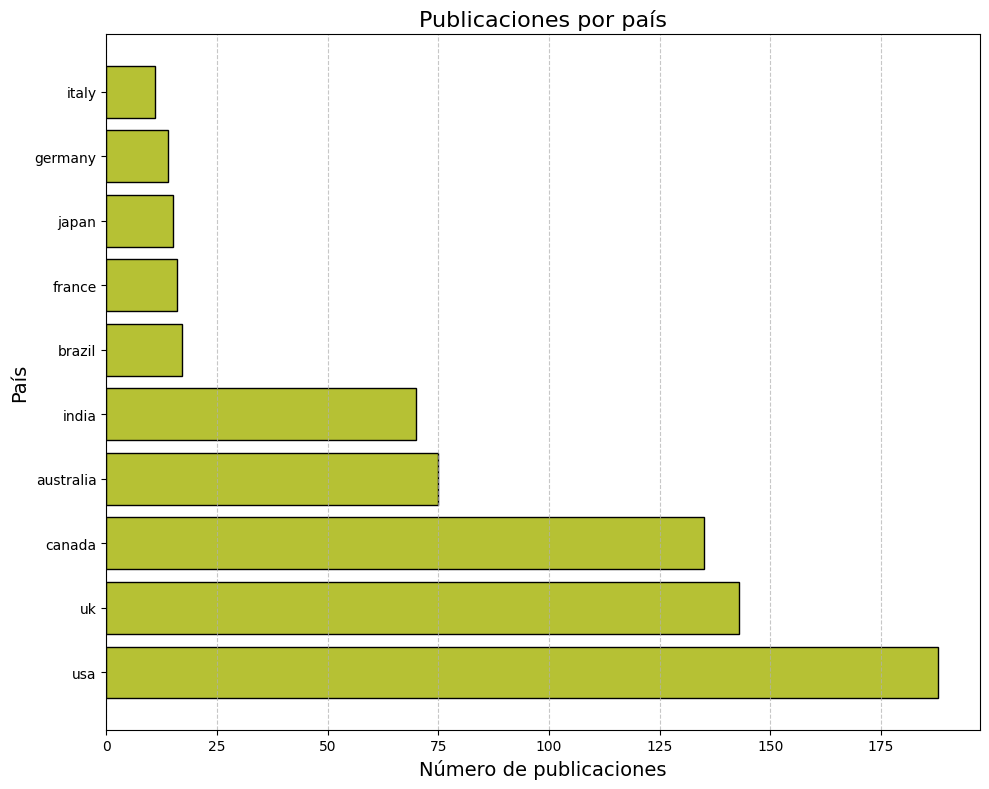

In [20]:
cantidad_publicaciones_paises = cantidad_publicaciones_paises.sort_values(by='Post', ascending=False)
top_10_paises = cantidad_publicaciones_paises.head(10)

grafica_post_pais = plt.figure(figsize=(10, 8))
plt.barh(top_10_paises['Country'], top_10_paises['Post'], color='#b6c134', edgecolor='black')
plt.title('Publicaciones por país', fontsize=16)
plt.xlabel('Número de publicaciones', fontsize=14)
plt.ylabel('País', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
grafica_post_pais.savefig('grafica_post_pais.jpg', dpi=300, bbox_inches='tight', transparent=True)

In [21]:
#Catidad de sentimientos positivos por pais
cantidad_positive = sentiments2[sentiments2['Sentiment'] == 'Positive']['Country'].value_counts().reset_index()
cantidad_positive.columns = ['Country', 'Positive Count']
cantidad_positive

,Country,Positive Count
0,usa,124
1,uk,87
2,canada,79
3,australia,37
4,india,35
5,japan,10
6,brazil,9
7,germany,7
8,france,7
9,italy,6


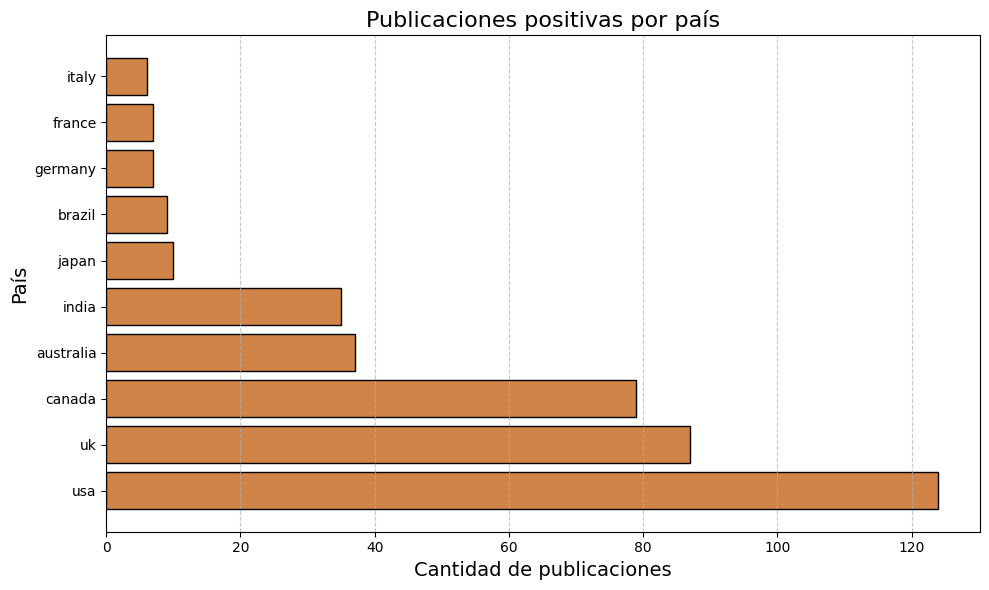

In [22]:
cantidad_positive = cantidad_positive.sort_values(by='Positive Count', ascending=False)
top_10_positive = cantidad_positive.head(10)

publicaciones_positivas_pais = plt.figure(figsize=(10, 6))
plt.barh(top_10_positive['Country'], top_10_positive['Positive Count'], color='#d18447', edgecolor='black')
plt.title('Publicaciones positivas por país', fontsize=16)
plt.xlabel('Cantidad de publicaciones', fontsize=14)
plt.ylabel('País', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
publicaciones_positivas_pais.savefig('publicaciones_positivas_pais.jpg', dpi=300, bbox_inches='tight', transparent=True)

In [23]:
#Catidad de sentimientos negativos por pais
cantidad_negative = sentiments2[sentiments2['Sentiment'] == 'Negative']['Country'].value_counts().reset_index()
cantidad_negative.columns = ['Country', 'Negative Count']
cantidad_negative

,Country,Negative Count
0,usa,47
1,canada,40
2,uk,34
3,india,22
4,australia,20
5,brazil,6
6,france,6
7,germany,5
8,spain,4
9,italy,3


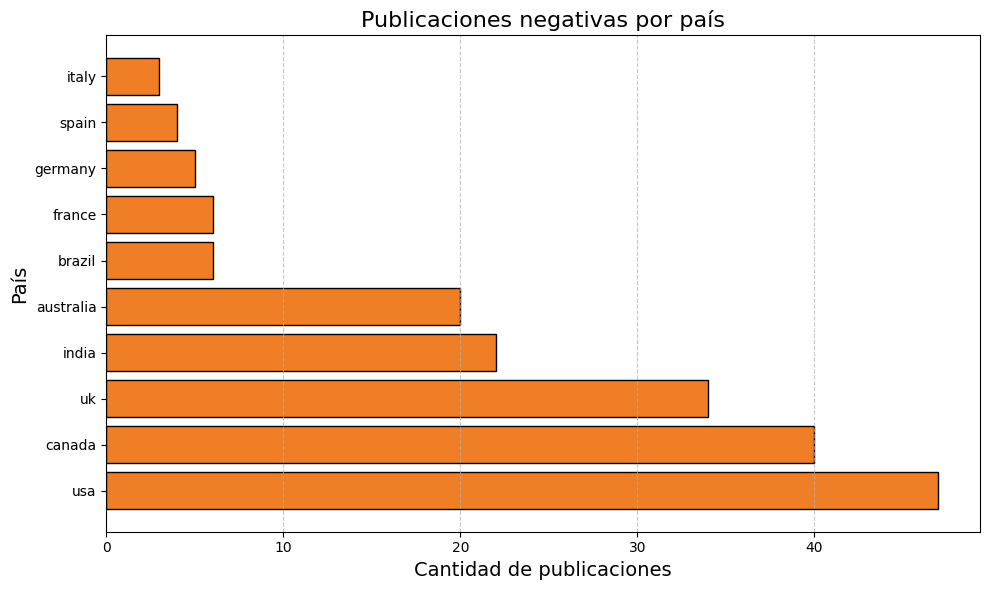

In [24]:
cantidad_negative = cantidad_negative.sort_values(by='Negative Count', ascending=False)
top_10_negative = cantidad_negative.head(10)

publicaciones_negativas_pais = plt.figure(figsize=(10, 6))
plt.barh(top_10_negative['Country'], top_10_negative['Negative Count'], color='#ef7e26', edgecolor='black')
plt.title('Publicaciones negativas por país', fontsize=16)
plt.xlabel('Cantidad de publicaciones', fontsize=14)
plt.ylabel('País', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
publicaciones_negativas_pais.savefig('publicaciones_negativas_pais.jpg', dpi=300, bbox_inches='tight', transparent=True)

In [25]:
#Catidad de sentimientos neutral por pais
cantidad_neutral = sentiments2[sentiments2['Sentiment'] == 'Neutral']['Country'].value_counts().reset_index()
cantidad_neutral.columns = ['Country', 'Neutral Count']
cantidad_neutral

,Country,Neutral Count
0,uk,22
1,australia,18
2,usa,17
3,canada,16
4,india,13
5,japan,3
6,france,3
7,greece,2
8,denmark,2
9,brazil,2


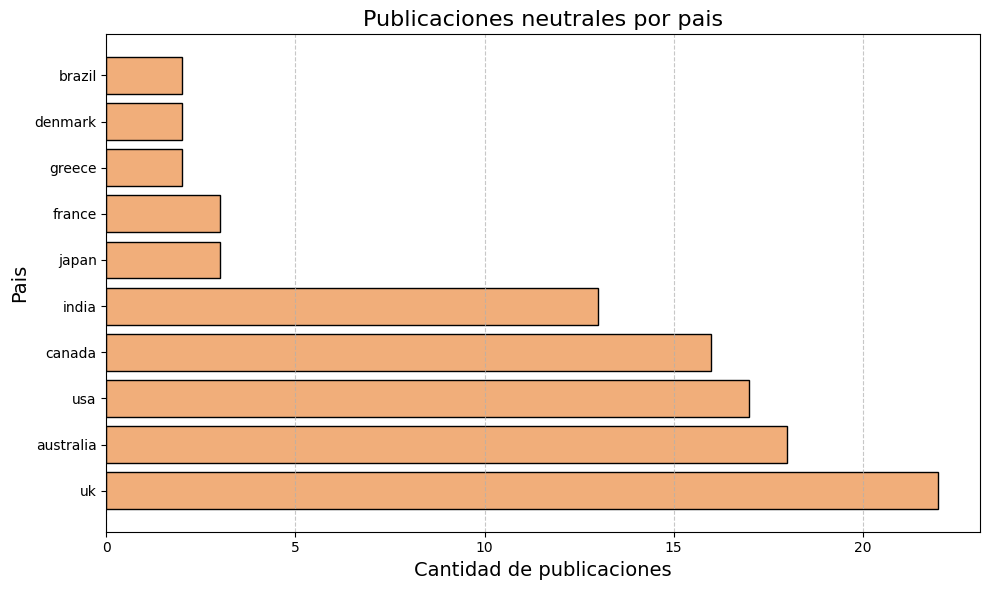

In [28]:
cantidad_neutral = cantidad_neutral.sort_values(by='Neutral Count', ascending=False)
top_10_negative = cantidad_neutral.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_negative['Country'], top_10_negative['Neutral Count'], color='#f1ae7a', edgecolor = 'black')

plt.title('Publicaciones neutrales por pais', fontsize=16)
plt.xlabel('Cantidad de publicaciones', fontsize=14)
plt.ylabel('Pais', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Graficas de los sentimientos en horarios laborales

In [29]:
def laboral(row):
    work_start, work_end = row['work']
    return work_start <= row['Hour'] <= work_end and row['Month'] in row['school']

dataframe_laboral = sentiments2[sentiments2.apply(laboral, axis=1)]

#cantidad de sentimientos positivos en horario y periodo laboral por pais
cantidad_positive_laboral = dataframe_laboral[dataframe_laboral['Sentiment'] == 'Positive']['Country'].value_counts().reset_index()
cantidad_positive_laboral.columns = ['Country', 'Positive Count']
cantidad_positive_laboral


,Country,Positive Count
0,usa,45
1,uk,37
2,canada,34
3,india,26
4,australia,20
5,france,6
6,japan,4
7,netherlands,2
8,portugal,2
9,italy,2


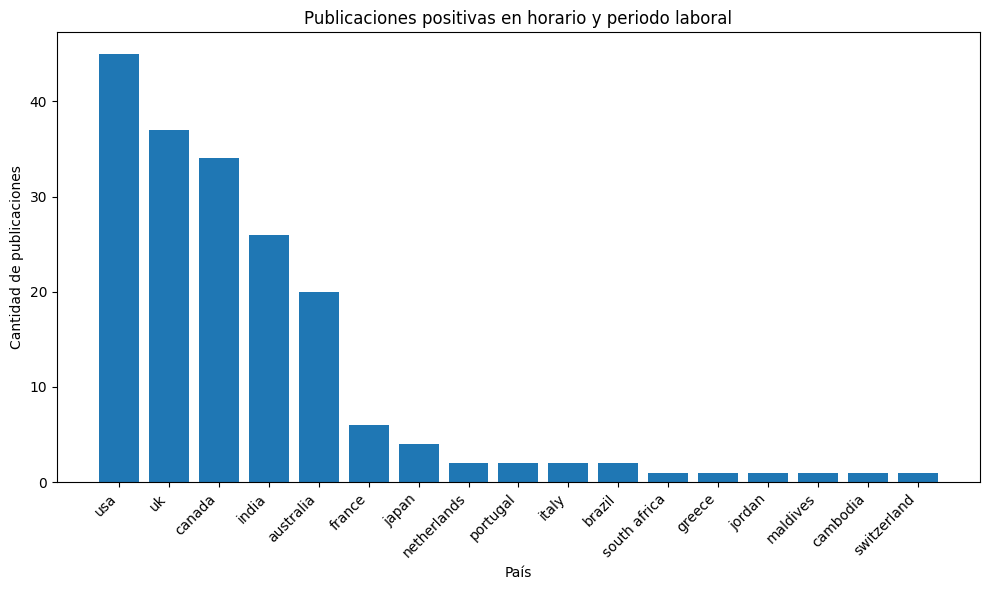

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(cantidad_positive_laboral['Country'], cantidad_positive_laboral['Positive Count'])

plt.title('Publicaciones positivas en horario y periodo laboral')
plt.xlabel('País')
plt.ylabel('Cantidad de publicaciones')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [31]:
#cantidad de sentimientos negativos en horario y periodo laboral por pais
cantidad_negative_laboral = dataframe_laboral[dataframe_laboral['Sentiment'] == 'Negative']['Country'].value_counts().reset_index()
cantidad_negative_laboral.columns = ['Country', 'Negative Count']
cantidad_negative_laboral

,Country,Negative Count
0,canada,25
1,uk,17
2,india,14
3,usa,11
4,australia,7
5,france,3
6,germany,3
7,brazil,2
8,spain,2
9,japan,1


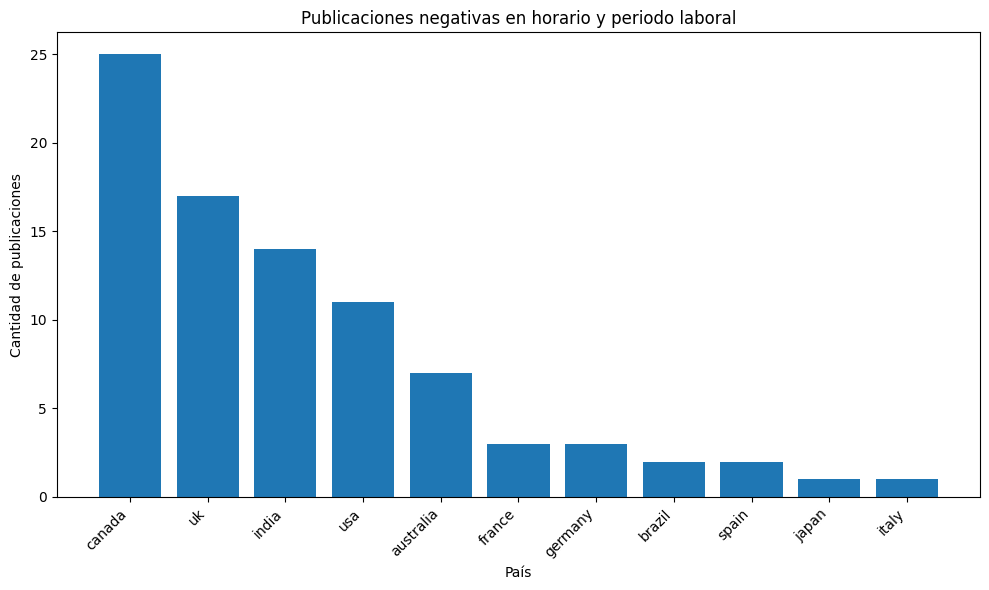

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(cantidad_negative_laboral['Country'], cantidad_negative_laboral['Negative Count'])

plt.title('Publicaciones negativas en horario y periodo laboral')
plt.xlabel('País')
plt.ylabel('Cantidad de publicaciones')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [33]:
#cantidad de sentimientos neutral en horario y periodo laboral por pais
cantidad_neutral_laboral = dataframe_laboral[dataframe_laboral['Sentiment'] == 'Neutral']['Country'].value_counts().reset_index()
cantidad_neutral_laboral.columns = ['Country', 'Neutral Count']
cantidad_neutral_laboral

,Country,Neutral Count
0,uk,14
1,usa,11
2,australia,10
3,canada,8
4,india,7
5,japan,2
6,france,2
7,denmark,2
8,brazil,2
9,italy,2


In [34]:
#cantidad total de sentimientos positivos, negativos y neutrales en horario laboral
suma_total_laboral = (cantidad_positive_laboral['Positive Count'].sum() + cantidad_negative_laboral['Negative Count'].sum() + cantidad_neutral_laboral['Neutral Count'].sum())
print(suma_total_laboral)
sum1 = cantidad_positive_laboral['Positive Count'].sum()
sum2 = cantidad_negative_laboral['Negative Count'].sum()
sum3 = cantidad_neutral_laboral['Neutral Count'].sum()
print((sum1/ suma_total_laboral) * 100)
print((sum2 / suma_total_laboral) * 100)
print((sum3 / suma_total_laboral) * 100)

336
55.35714285714286
25.595238095238095
19.047619047619047


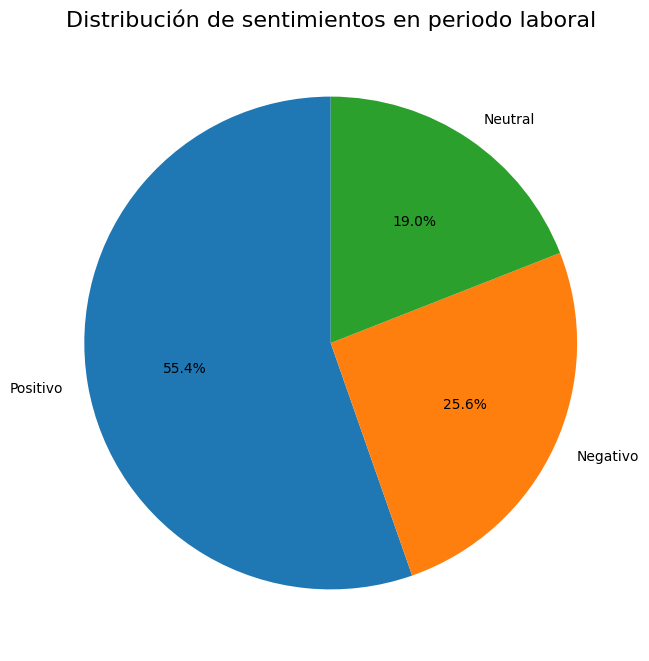

In [35]:
sentimiento = ['Positivo', 'Negativo', 'Neutral']
porcentajes = [55.35, 25.59, 19.04]  # Porcentajes de cada categoría
pastel_dis_laboral = plt.figure(figsize=(8, 8))
plt.pie(porcentajes, labels=sentimiento, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de sentimientos en periodo laboral', fontsize=16)
plt.show()
pastel_dis_laboral.savefig('pastel_dis_laboral.jpg', dpi=300, bbox_inches='tight', transparent=True)

In [36]:
#cantidad total de sentimientos positivos, negativos y neutrales en horario no laboral
suma_total = cantidad_positive['Positive Count'].sum() + cantidad_negative['Negative Count'].sum() + cantidad_neutral['Neutral Count'].sum()
suma_total_summer = suma_total - suma_total_laboral 
print(suma_total_summer)
print(((cantidad_positive['Positive Count'].sum() - sum1) / suma_total_summer) * 100)
print(((cantidad_negative['Negative Count'].sum() - sum2)/ suma_total_summer) * 100)
print(((cantidad_neutral['Neutral Count'].sum() - sum3)/ suma_total_summer) * 100)

396
61.86868686868687
27.77777777777778
10.353535353535353


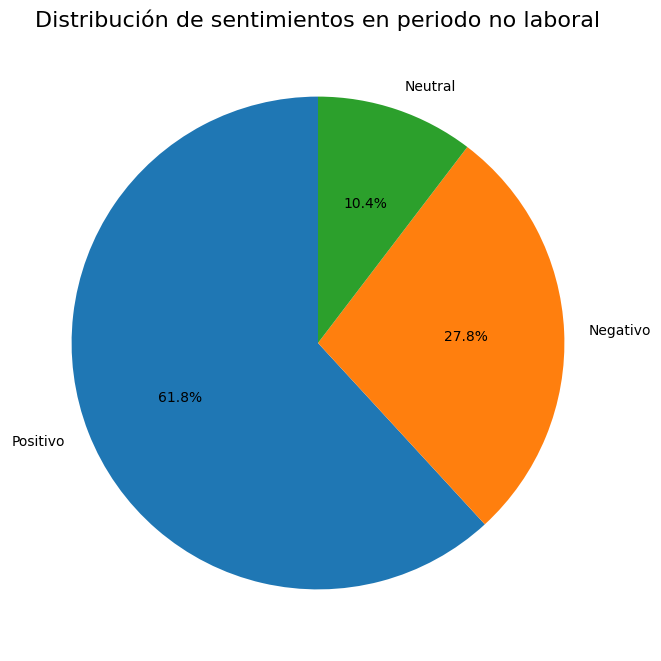

In [37]:
sentimiento = ['Positivo', 'Negativo', 'Neutral']
porcentajes = [61.77, 27.77, 10.35]  # Porcentajes de cada categoría
pastel_dis_no_laboral = plt.figure(figsize=(8, 8))
plt.pie(porcentajes, labels=sentimiento, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de sentimientos en periodo no laboral', fontsize=16)
plt.show()
pastel_dis_no_laboral.savefig('pastel_dis_no_laboral.jpg', dpi=300, bbox_inches='tight', transparent=True)


analisis de la cantidad de publicaciones por hora

In [43]:
#Hora con mayor cantidad de publicaciones
hora = sentiments2['Hour'].value_counts().reset_index()
hora.columns = ['Hour', 'Count']
hora = hora.sort_values(by='Count', ascending=False)
hora

,Hour,Count
0,14,94
1,19,75
2,16,69
3,18,65
4,20,50
5,17,48
6,15,47
7,21,41
8,12,38
9,11,37


In [40]:
#Catidad de sentimientos positivos por hora
cantidad_positive_hour = sentiments2[sentiments2['Sentiment'] == 'Positive']['Hour'].value_counts().reset_index()
cantidad_positive_hour.columns = ['Hour', 'Positive Count']
cantidad_positive_hour

,Hour,Positive Count
0,14,55
1,19,54
2,16,45
3,18,43
4,20,32
5,17,22
6,12,21
7,15,21
8,13,21
9,10,20


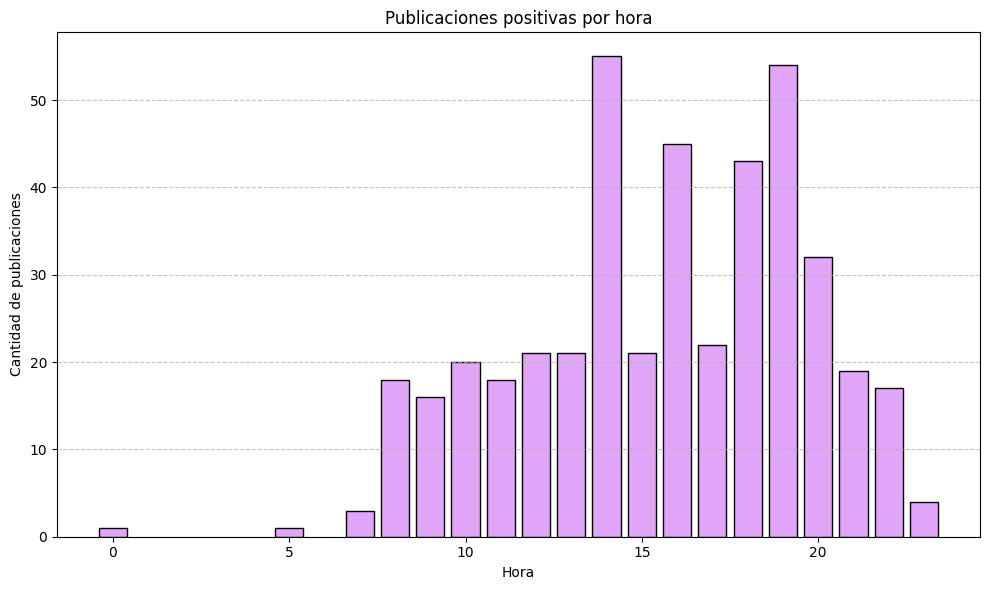

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(cantidad_positive_hour['Hour'], cantidad_positive_hour['Positive Count'],color='#e2a6f9', edgecolor='black')

plt.title('Publicaciones positivas por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de publicaciones')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
#Catidad de sentimientos negativos por hora
cantidad_negative_hour = sentiments2[sentiments2['Sentiment'] == 'Negative']['Hour'].value_counts().reset_index()
cantidad_negative_hour.columns = ['Hour', 'Negative Count']
cantidad_negative_hour

,Hour,Negative Count
0,14,29
1,16,18
2,18,17
3,21,17
4,19,17
5,15,14
6,22,14
7,20,13
8,17,13
9,11,10


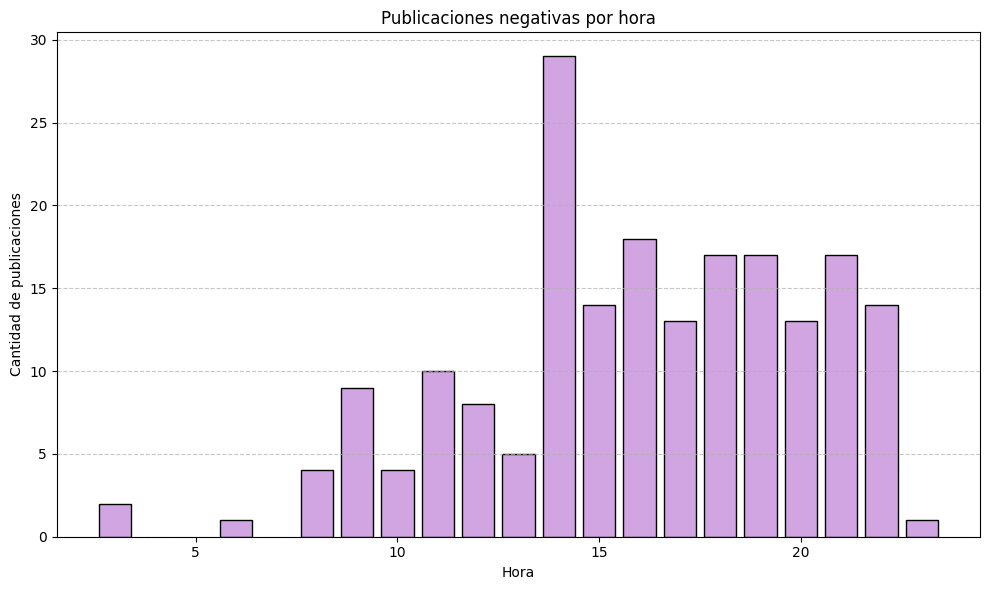

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(cantidad_negative_hour['Hour'], cantidad_negative_hour['Negative Count'],color='#d1a5e1', edgecolor='black')

plt.title('Publicaciones negativas por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de publicaciones')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
#Catidad de sentimientos neutrales por hora
cantidad_neutral_hour = sentiments2[sentiments2['Sentiment'] == 'Neutral']['Hour'].value_counts().reset_index()
cantidad_neutral_hour.columns = ['Hour', 'Neutral Count']
cantidad_neutral_hour

,Hour,Neutral Count
0,17,13
1,15,12
2,14,10
3,12,9
4,11,9
5,10,6
6,16,6
7,20,5
8,18,5
9,21,5


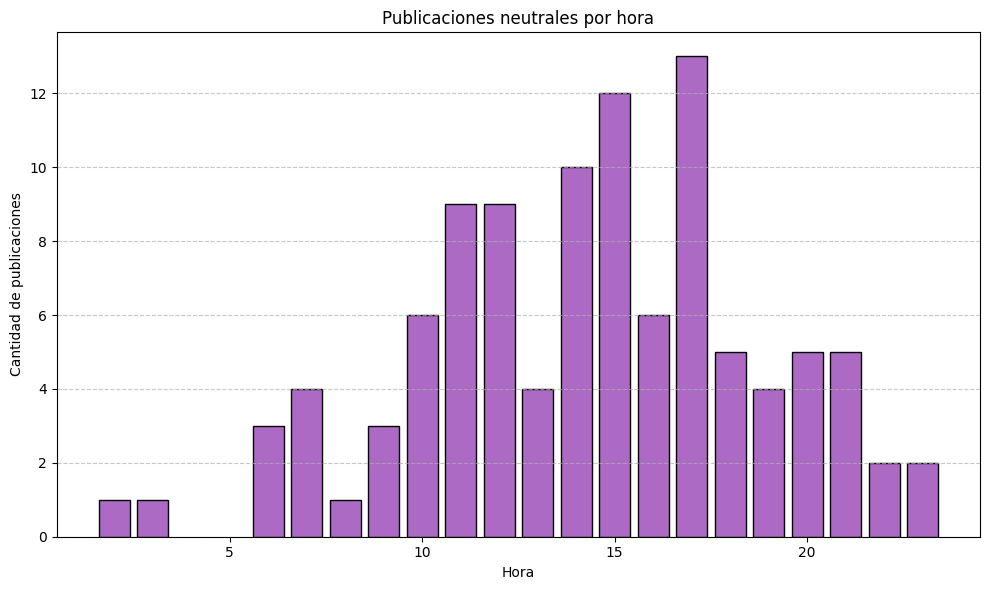

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(cantidad_neutral_hour['Hour'], cantidad_neutral_hour['Neutral Count'],color='#ac6ac5', edgecolor='black')

plt.title('Publicaciones neutrales por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de publicaciones')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [49]:
sentiments2['Platform'] = sentiments2['Platform'].str.strip()
sentiments2['Platform'] = sentiments2['Platform'].str.lower()
sentiments2['Platform'] = sentiments2['Platform'].str.replace(r'[^\w\s]', '', regex=True)

#Cantidad de publicaciones por pais
plataforma = sentiments2['Platform'].value_counts().reset_index()
plataforma.columns = ['Platform', 'Post']
plataforma

,Platform,Post
0,instagram,258
1,twitter,243
2,facebook,231
